<a href="https://colab.research.google.com/github/zpenct/Social-Network-Analysis/blob/main/Salinan_lain_dari_Salinan_lain_dari_INFINIX_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sastrawi --quiet
!pip install emoji --quiet
!pip install swifter --quiet
!pip install nltk --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import re
import swifter
import string
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from nltk.tokenize import TreebankWordTokenizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from google.colab import drive

In [ ]:
df=pd.read_csv("scrapping-review-sicepat.csv")

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Preprocessing**

In [ ]:
df['full_text'] = df['full_text'].astype(str)
df['full_text'] = df['full_text'].str.lower()

def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = text.strip()
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'http\S+|www.\S+', '', text)  # Hapus link
    text = re.sub(r'[^\w\s,.!?]', '', text, flags=re.UNICODE)  # Hapus emoji/simbol
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi berlebih
    return text.translate(str.maketrans("","",string.punctuation))

df['full_text']=df['full_text'].apply(clean_text)

In [ ]:
tokenizer = TreebankWordTokenizer()
df['Tokenized Text'] = df['full_text'].astype(str).apply(tokenizer.tokenize)

In [ ]:
normalization_dict = {
    # Variasi penulisan nama ekspedisi
    "sicepat": "sicepat",
    "si cepat": "sicepat",
    "sicepat_ekspres": "sicepat",
    "sicepat ekspres": "sicepat",
    "@sicepat_ekspres": "sicepat",
    "sicepat_ekpres": "sicepat",
    "sicepat halu": "sicepat",
    "si kontol": "sicepat",
    "silambat": "sicepat",
    "sitelat": "sicepat",
    "silelet": "sicepat",
    "sicepat_lambat": "sicepat",

    # Variasi penulisan ekspedisi lain
    "jnt": "jnt",
    "@jntexpressid": "jnt",
    "j&t": "jnt",
    "jntexpressid": "jnt",
    "j&amp;t": "jnt",
    "jt": "jnt",
    "jne": "jne",
    "@jnecare": "jne",
    "j&amp;e": "jne",
    "spx": "shopee_express",
    "@spx_shopeexpres": "shopee_express",
    "shopee express": "shopee_express",
    "shopee_express": "shopee_express",
    "shopeeexpress": "shopee_express",
    "spx_shopeexpres": "shopee_express",
    "anteraja": "anteraja",
    "@anterajacare": "anteraja",
    "anter aja": "anteraja",
    "antar aja": "anteraja",
    "pos indonesia": "pos",
    "wahana": "wahana",
    "ninja": "ninja",
    "ninja expres": "ninja",
    "lion parcel": "lion",
    "lnp": "lion",

    # E-commerce
    "tokped": "tokopedia",
    "tokopedia": "tokopedia",
    "@tokopedia": "tokopedia",
    "@tokopediacare": "tokopedia",
    "shopee": "shopee",
    "@shopee_id": "shopee",
    "@shopeeid": "shopee",
    "@shopeecare": "shopee",
    "tiktokshop": "tiktok_shop",

    # Kata positif
    "bagus": "bagus",
    "baik": "baik",
    "ramah": "ramah",
    "cepat": "cepat",
    "tepat waktu": "tepat_waktu",
    "aman": "aman",
    "amanah": "amanah",
    "terbaik": "terbaik",
    "keren": "keren",
    "mantap": "mantap",
    "puas": "puas",
    "selamat": "selamat",
    "sentosa": "sentosa",
    "terima kasih": "terima_kasih",
    "makasih": "terima_kasih",
    "thx": "terima_kasih",
    "thanks": "terima_kasih",
    "alhamdulillah": "alhamdulillah",
    "sip": "bagus",
    "ok": "bagus",
    "oke": "bagus",
    "kenal": "kenal",
    "gokil": "keren",
    "murah": "murah",
    "satset": "cepat",
    "gercep": "cepat",
    "proper": "bagus",

    # Kata negatif
    "lambat": "lambat",
    "lelet": "lambat",
    "lemot": "lambat",
    "lama": "lambat",
    "stuck": "stuck",
    "telat": "telat",
    "molor": "telat",
    "delay": "telat",
    "hilang": "hilang",
    "ilang": "hilang",
    "goib": "hilang",
    "jelek": "jelek",
    "buruk": "buruk",
    "kacau": "buruk",
    "kecewa": "kecewa",
    "jera": "kecewa",
    "kapok": "kecewa",
    "trauma": "trauma",
    "rugi": "rugi",
    "nyesel": "kecewa",
    "masalah": "masalah",
    "kendala": "masalah",
    "komplain": "komplain",
    "komplen": "komplain",
    "complain": "komplain",
    "claim": "klaim",
    "klaim": "klaim",
    "gak": "tidak",
    "ga": "tidak",
    "tidak": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "tak": "tidak",
    "parah": "parah",
    "lempar": "lempar",
    "pecah": "rusak",
    "rusak": "rusak",
    "penyok": "rusak",
    "retur": "retur",
    "ditahan": "ditahan",
    "dikembalikan": "retur",
    "bad address": "alamat_salah",
    "alamat tidak ditemukan": "alamat_salah",
    "tidak ditemukan": "alamat_salah",
    "pickup gagal": "pickup_gagal",
    "belum pickup": "pickup_gagal",
    "gak diambil": "pickup_gagal",
    "tidak diambil": "pickup_gagal",
    "tutup": "tutup",
    "bantuan": "bantuan",
    "tolong": "bantuan",
    "tanggung jawab": "tanggung_jawab",
    "pertanggung jawaban": "tanggung_jawab",
    "bertanggung jawab": "tanggung_jawab",
    "customer service": "cs",
    "cs": "cs",
    "call center": "cs",
    "customer care": "cs",
    "gak respon": "tidak_respon",
    "no response": "tidak_respon",
    "tidak direspon": "tidak_respon",
    "bot": "bot",
    "tidak membantu": "tidak_membantu",
    "ga membantu": "tidak_membantu",
    "kurang membantu": "tidak_membantu",
    "sabar": "sabar",
    "boikot": "boikot",
    "bangkrut": "bangkrut",

    # Kata umum lainnya
    "ekspedisi": "ekspedisi",
    "kurir": "kurir",
    "paket": "paket",
    "resi": "resi",
    "estimasi": "estimasi",
    "ongkir": "ongkir",
    "pengiriman": "pengiriman",
    "kirim": "kirim",
    "ngirim": "kirim",
    "pick up": "pickup",
    "pickup": "pickup",
    "drop off": "drop",
    "drop": "drop",
    "cod": "cod",
    "tracking": "tracking",
    "pelacak": "tracking",
    "next day": "next_day",
    "regular": "regular",
    "reguler": "regular",
    "status": "status",
    "update": "update",
    "gudang": "gudang",
    "sortir": "sortir",
    "pengalaman": "pengalaman",
    "seller": "penjual",
    "penjual": "penjual",

    # Kata gaul
    "gue": "saya",
    "gw": "saya",
    "aku": "saya",
    "w": "saya",
    "kamu": "kamu",
    "km": "kamu",
    "lu": "kamu",
    "kau": "kamu",
    "elu": "kamu",
    "lo": "kamu",
    "bgst": "kasar",
    "anjir": "kasar",
    "anjing": "kasar",
    "anjrit": "kasar",
    "anjg": "kasar",
    "anjer": "kasar",
    "anjir": "kasar",
    "anjrot": "kasar",
    "anj": "kasar",
    "bgst": "kasar",
    "bangsat": "kasar",
    "bangke": "kasar",
    "bngst": "kasar",
    "tai": "kasar",
    "kontol": "kasar",
    "kntl": "kasar",
    "kntll": "kasar",
    "ngentot": "kasar",
    "ngen": "kasar",
    "fak": "kasar",
    "fakmen": "kasar",
    "su": "kasar",
    "asu": "kasar",
    "asw": "kasar",
    "bgt": "banget",
    "banget": "banget",
    "bener": "benar",
    "bnr": "benar",
    "kyk": "seperti",
    "kek": "seperti",
    "ky": "seperti",
    "ga tau": "tidak_tahu",
    "gatau": "tidak_tahu",
    "idk": "tidak_tahu",
    "udah": "sudah",
    "udh": "sudah",
    "dah": "sudah",
    "sdh": "sudah",
    "blm": "belum",
    "belum": "belum",
    "lbh": "lebih",
    "lebih": "lebih",
    "gk": "tidak",
    "tdk": "tidak",
    "gak": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "ngga": "tidak",
    "yg": "yang",
    "klo": "kalau",
    "klw": "kalau",
    "kalo": "kalau",
    "kl": "kalau",
    "kalau": "kalau",
    "dgn": "dengan",
    "sama": "dengan",
    "sm": "dengan",
    "dg": "dengan",
    "ny": "nya",
    "nya": "nya",
    "emg": "memang",
    "mmg": "memang",
    "emang": "memang",
    "mana": "dimana",
    "dmn": "dimana",
    "dimana": "dimana",
    "knp": "kenapa",
    "kenapa": "kenapa",
    "jgn": "jangan",
    "jgan": "jangan",
    "jangan": "jangan",
    "gmn": "bagaimana",
    "gimana": "bagaimana",
    "gmana": "bagaimana",
    "gitu": "begitu",
    "gt": "begitu",
    "bgtu": "begitu",
    "aja": "saja",
    "aj": "saja",
    "ajg": "kasar",
    "trs": "terus",
    "terus": "terus",
    "truss": "terus",
    "trus": "terus",
    "tp": "tapi",
    "tpi": "tapi",
    "tapi": "tapi",
    "biar": "supaya",
    "spy": "supaya",
    "byr": "bayar",
    "sih": "sih",
    "krn": "karena",
    "karna": "karena",
    "krna": "karena",
    "skrg": "sekarang",
    "skg": "sekarang",
    "skrng": "sekarang",
    "skrang": "sekarang",
    "dll": "dan_lain_lain",
    "dkk": "dan_kawan_kawan",
    "utk": "untuk",
    "u/": "untuk",
    "bwt": "buat",
    "buat": "untuk",
    "dr": "dari",
    "drpd": "daripada",
    "pd": "pada",
    "jd": "jadi",
    "msh": "masih",
    "sy": "saya",
    "sya": "saya",
    "min": "admin",
    "admin": "admin",
    "plis": "tolong",
    "pliss": "tolong",
    "please": "tolong",
    "pls": "tolong",
    "tolong": "tolong",
    "tlg": "tolong",
    "tlng": "tolong",
    "tlong": "tolong",
    "btw": "omong_omong",
    "oot": "out_of_topic",
    "guys": "teman_teman",
    "guyz": "teman_teman",
    "gaes": "teman_teman",
    "gaess": "teman_teman",
    "gais": "teman_teman",
    "gays": "teman_teman",
    "guyss": "teman_teman",
    "coba": "coba",
    "cb": "coba",
    "wkwk": "tertawa",
    "wkwkwk": "tertawa",
    "haha": "tertawa",
    "hahaha": "tertawa",
    "wkkw": "tertawa",
    "xixi": "tertawa",
    "tq": "terima_kasih",
    "thx": "terima_kasih",
    "makasih": "terima_kasih",
    "makasi": "terima_kasih",
    "mksih": "terima_kasih",
    "thank": "terima_kasih",
    "thanks": "terima_kasih",
    "thnks": "terima_kasih",
    "tks": "terima_kasih",
    "thank you": "terima_kasih",
    "ty": "terima_kasih",
    "tenkyu": "terima_kasih",

    # Singkatan lain
    "cs": "customer_service",
    "cp": "contact_person",
    "wa": "whatsapp",
    "dm": "direct_message",
    "ig": "instagram",
    "ss": "screenshot",
    "pap": "screenshot",
    "pic": "photo",
    "co": "checkout",
    "c.o": "checkout",
    "hp": "handphone",
    "pc": "personal_computer",
    "sms": "short_message_service",
    "krm": "kirim",
    "est": "estimasi",
    "info": "informasi",
    "info": "informasi",
    "ya allah": "ya_allah",
    "ya ampun": "ya_ampun",
    "yaa": "ya",
    "yah": "ya",
    "ya": "ya",
    "gpp": "tidak_apa_apa",
    "gak papa": "tidak_apa_apa",
    "gapapa": "tidak_apa_apa",
    "gaada": "tidak_ada",
    "g ada": "tidak_ada",
    "gada": "tidak_ada",
    "nggak ada": "tidak_ada",
    "ngga ada": "tidak_ada",
    "ga ad": "tidak_ada",
    "tdk ad": "tidak_ada",
    "no": "tidak",
    "hrs": "harus",
    "hbs": "habis",
    "asap": "secepatnya",
    "asep": "secepatnya",
    "apd": "apa"
}


def normalize_tokens(tokens):
    return [normalization_dict.get(token, token) for token in tokens]

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
normalizad_word = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 6/NLP/colloquial-indonesian-lexicon.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row['slang'] not in normalizad_word_dict:
        normalizad_word_dict[row['slang']] = row['formal']

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [ ]:
df['Normalized Text']=df['Tokenized Text'].apply(normalize_tokens).apply(normalized_term)
df

,conversation_id_str,created_at,favorite_count,label,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Tokenized Text,Normalized Text
0,1810954820418928755,Wed Jul 10 08:30:49 +0000 2024,0,-1,ga lagi lagi pakai sicepat next day serasa regular,1810954820418928755,NaN,NaN,in,Depok,0,0,0,https://x.com/rizky_tfq/status/1810954820418928755,2776796508,rizky_tfq,"[ga, lagi, lagi, pakai, sicepat, next, day, serasa, regular]","[tidak, lagi, lagi, pakai, sicepat, next, day, serasa, regular]"
1,1896616678949347519,Mon Mar 03 17:40:28 +0000 2025,0,-1,halo tolong dong paket saya yang menggunakan ekspedisi sicepat ga ada update dari tanggal 1 maret 2025 udah coba complain ke sicepat tapi responnya disuruh sabar terus masalahnya itu paket penting dan harganya lumayan tolong dong tanggung jawabnya,1896616678949347519,NaN,NaN,in,Banana Republic,0,2,0,https://x.com/roastedroid/status/1896616678949347519,1291369982241042432,roastedroid,"[halo, tolong, dong, paket, saya, yang, menggunakan, ekspedisi, sicepat, ga, ada, update, dari, tanggal, 1, maret, 2025, udah, coba, complain, ke, sicepat, tapi, responnya, disuruh, sabar, terus, masalahnya, itu, paket, penting, dan, harganya, lumayan, tolong, dong, tanggung, jawabnya]","[halo, tolong, dong, paket, saya, yang, menggunakan, ekspedisi, sicepat, tidak, ada, update, dari, tanggal, 1, maret, 2025, sudah, coba, komplain, ke, sicepat, tapi, responnya, disuruh, sabar, terus, masalahnya, itu, paket, penting, dan, harganya, lumayan, tolong, dong, tanggung, jawabnya]"
2,1870863477746868717,Sun Dec 22 16:06:26 +0000 2024,0,-1,kok shopee tumben kurir rekomendasinya pakai sicepat padahal aku udah merasa aman kalau bakal spx mana lama bgt,1870863477746868717,NaN,NaN,in,NaN,0,0,0,https://x.com/ParkHara04/status/1870863477746868717,895811087433465856,ParkHara04,"[kok, shopee, tumben, kurir, rekomendasinya, pakai, sicepat, padahal, aku, udah, merasa, aman, kalau, bakal, spx, mana, lama, bgt]","[kok, shopee, tumben, kurir, rekomendasinya, pakai, sicepat, padahal, saya, sudah, merasa, aman, kalau, bakal, shopee_express, dimana, lambat, banget]"
3,1868884815912816854,Tue Dec 17 05:03:56 +0000 2024,5,-1,halo tolong bantu kasus paket saya yg ditukar paket dikirim pakai jasa pesanan saya poco m6 yg datang infinix smart 9 sudah mengajukan komplain dgn melampirkan video unboxing seller juga melampirkan video packing lanjut,1868884815912816854,NaN,NaN,in,"Depok, Jawa Barat, Indonesia",1,3,2,https://x.com/putrilogi_/status/1868884815912816854,1830495322910646272,putrilogi_,"[halo, tolong, bantu, kasus, paket, saya, yg, ditukar, paket, dikirim, pakai, jasa, pesanan, saya, poco, m6, yg, datang, infinix, smart, 9, sudah, mengajukan, komplain, dgn, melampirkan, video, unboxing, seller, juga, melampirkan, video, packing, lanjut]","[halo, tolong, bantu, kasus, paket, saya, yang, ditukar, paket, dikirim, pakai, jasa, pesanan, saya, poco, m6, yang, datang, infinix, smart, 9, sudah, mengajukan, komplain, dengan, melampirkan, video, unboxing, penjual, juga, melampirkan, video, packing, lanjut]"
4,1877639618952413506,Fri Jan 10 08:52:24 +0000 2025,0,-1,sumpah gue benci banget sama kayak maksud gue kan tinggal pick up barang dibilang alamat gue tidak ditemukan padahal alamat sudah jelas bahkan sampe ke nomer kode pos udah coba email dan kasih nomer wa aktif malah dibilang sekarang nomer resi gue salah,1877639618952413506,NaN,NaN,in,rps. fa. 21+,0,2,0,https://x.com/chaobantalay/status/1877639618952413506,1158707948081729541,chaobantalay,"[sumpah, gue, benci, banget, sama, kayak, maksud, gue, kan, tinggal, pick, up, barang, dibilang, alamat, gue, tidak, ditemukan, padahal, alamat, sudah, jelas, bahkan, sampe, ke, nomer, kode, pos, udah, coba, email, dan, kasih, nomer, wa, aktif, malah, dibilang, sekarang, nomer, resi, gue, salah]","[sumpah, saya, benci, banget, dengan, kayak, maksud, saya, kan, tinggal, pick, up, barang, dibilang, alamat, saya, tidak, dit

In [ ]:
stop_words = set(stopwords.words('indonesian'))
stop_words = [word for word in stop_words if word not in ['lama', 'datang', 'salah']]

def remove_stopwords(tokens):
  return[word for word in tokens if word not in stop_words]

df['Stopwords Removed']=df['Normalized Text'].apply(remove_stopwords)
df['Stopwords Removed']

,Stopwords Removed
0,"[pakai, sicepat, next, day, serasa, regular]"
1,"[halo, tolong, paket, ekspedisi, sicepat, update, tanggal, 1, maret, 2025, coba, komplain, sicepat, responnya, disuruh, sabar, paket, harganya, lumayan, tolong, tanggung]"
2,"[shopee, tumben, kurir, rekomendasinya, pakai, sicepat, aman, shopee_express, dimana, lambat, banget]"
3,"[halo, tolong, bantu, paket, ditukar, paket, dikirim, pakai, jasa, pesanan, poco, m6, datang, infinix, smart, 9, mengajukan, komplain, melampirkan, video, unboxing, penjual, melampirkan, video, packing]"
4,"[sumpah, benci, banget, kayak, maksud, tinggal, pick, up, barang, dibilang, alamat, ditemukan, alamat, nomer, kode, pos, coba, email, kasih, nomer, whatsapp, aktif, dibilang, nomer, resi, salah]"
...,...
226,"[keren, deh, sicepat, semalem, drop, jam, 12, siang, buyerku]"
227,"[admin, kurang²in, timbun², paket, deh, semoga, kedepannya, ya]"
228,"[keren, banget, sicepat, halu, coy, kirim, paket, tegal, jogja, 24, jam, drop, off, paketnya, senin, siang, paketnya]"
229,"[yampun, abang, sicepat, banget, deh]"


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Stemmed'] = df['Stopwords Removed'].apply(stem_tokens)
df["clean_text"] = [' '.join(map(str, l)) for l in df['Stemmed']]
df['clean_text']

,clean_text
0,pakai sicepat next day serasa regular
1,halo tolong paket ekspedisi sicepat update tanggal 1 maret 2025 coba komplain sicepat responnya suruh sabar paket harga lumayan tolong tanggung
2,shopee tumben kurir rekomendasi pakai sicepat aman shopee express mana lambat banget
3,halo tolong bantu paket tukar paket kirim pakai jasa pesan poco m6 datang infinix smart 9 aju komplain lampir video unboxing jual lampir video packing
4,sumpah benci banget kayak maksud tinggal pick up barang bilang alamat temu alamat nomer kode pos coba email kasih nomer whatsapp aktif bilang nomer resi salah
...,...
226,keren deh sicepat semalem drop jam 12 siang buyerku
227,admin kurang in timbun paket deh moga depan ya
228,keren banget sicepat halu coy kirim paket tegal jogja 24 jam drop off paket senin siang paket
229,yampun abang sicepat banget deh


In [ ]:
"""
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())
stemmer = StemmerFactory().create_stemmer()


# --- STOPWORDS BAHASA INDONESIA ---
stopwords_id = set([
    'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'untuk', 'dengan',
    'juga', 'ada', 'karena', 'pada', 'tidak', 'sudah', 'saja', 'oleh',
    'kami', 'kita', 'mereka', 'saya', 'aku', 'anda', 'atau', 'tapi', 'lagi',
    'agar', 'bagi', 'sebagai', 'adalah', 'dalam', 'dia', 'ia', 'yah', 'oh',
    'eh', 'ah', 'pun', 'ya', 'kok', 'kan', 'lah', 'dong', 'nih', 'deh', 'vs', 'VS','Vs', 'lalu','akan','sampai','bisa','apa','antara','apakah','dgn','link','gak','akun','pas','aja','padahal', 'uniqlo', 'jaket', 'uv','infinix','hot','yg','kalo','udah','banget','nih','nder','kalau'
])

# --- CLEANING + STOPWORD REMOVAL ---
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = text.strip()
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'http\S+|www.\S+', '', text)  # Hapus link
    text = re.sub(r'[^\w\s,.!?]', '', text, flags=re.UNICODE)  # Hapus emoji/simbol
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi berlebih

    # Hapus stopword
    tokens = text.split()
    filtered = [word for word in tokens if word not in stopwords_id and len(word) > 2 and not word.isdigit()]
    return ' '.join(filtered)

# # Define the text cleaning function
# def clean_text(text):
#     if pd.isna(text):
#         return ''
#     text = text.lower()
#     text = re.sub(r"http\S+|www.\S+", "", text)         # Remove URLs
#     text = re.sub(r"@\w+", "", text)                    # Remove mentions
#     text = re.sub(r"#\w+", "", text)                    # Remove hashtags
#     text = emoji.replace_emoji(text, "")                # Remove emojis
#     text = re.sub(r"\d+", "", text)                     # Remove numbers
#     text = re.sub(r"[^\w\s]", "", text)                 # Remove punctuation
#     text = re.sub(r"\s+", " ", text).strip()            # Remove extra whitespace
#     return text

# Define preprocessing pipeline (clean + stopword + stemming)
def preprocess(text):
    text = clean_text(text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    stemmed = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed)

# Apply preprocessing
df['clean_text'] = df['full_text'].apply(preprocess)

# Show sample of original vs cleaned text
df[['full_text', 'clean_text', 'label']].head()


### **Sentiment Classification – TF-IDF + Naive Bayes**

In [ ]:
# from transformers import pipeline

# sentiment = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# def label_model(text):
#     result = sentiment(text)[0]['label']
#     if result == 'POSITIVE':
#         return 1
#     elif result == 'NEGATIVE':
#         return -1
#     else:
#         return 0

# df['label'] = df['clean_text'].apply(label_model)

Device set to use cpu


In [ ]:
# df.head(100)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,retweet_count,tweet_url,user_id_str,username,Tokenized Text,Normalized Text,Stopwords Removed,Stemmed,clean_text,label
0,1810954820418928755,Wed Jul 10 08:30:49 +0000 2024,0,ga lagi lagi pakai sicepat next day serasa regular,1810954820418928755,NaN,NaN,in,Depok,0,...,0,https://x.com/rizky_tfq/status/1810954820418928755,2776796508,rizky_tfq,"[ga, lagi, lagi, pakai, sicepat, next, day, serasa, regular]","[tidak, lagi, lagi, pakai, sicepat, next, day, serasa, regular]","[pakai, sicepat, next, day, serasa, regular]","[pakai, sicepat, next, day, serasa, regular]",pakai sicepat next day serasa regular,0
1,1573522845883564034,Sat Sep 24 04:00:55 +0000 2022,486,belum bersih banget sih tapi aku mau review produk kecintaan aku yg nemenin aku dimasa struggle nya menghadapi masalah kulit wajah st oily acne prone honest skincare review based on my experience a thread,1573522845883564034,https://pbs.twimg.com/media/FdZGrNuaUAIqIO7.jpg,NaN,in,NaN,6,...,124,https://x.com/stoberiisusu/status/1573522845883564034,1349707932628185088,stoberiisusu,"[belum, bersih, banget, sih, tapi, aku, mau, review, produk, kecintaan, aku, yg, nemenin, aku, dimasa, struggle, nya, menghadapi, masalah, kulit, wajah, st, oily, acne, prone, honest, skincare, review, based, on, my, experience, a, thread]","[belum, bersih, banget, , tetapi, aku, ingin, review, produk, kecintaan, aku, yang, nemenin, aku, dimasa, struggle, nya, menghadapi, masalah, kulit, wajah, st, oily, acne, prone, honest, skincare, review, based, on, my, experience, a, thread]","[bersih, banget, , review, produk, kecintaan, nemenin, dimasa, struggle, nya, menghadapi, kulit, wajah, st, oily, acne, prone, honest, skincare, review, based, on, my, experience, a, thread]","[bersih, banget, , review, produk, cinta, nemenin, masa, struggle, nya, hadap, kulit, wajah, st, oily, acne, prone, honest, skincare, review, based, on, my, experience, a, thread]",bersih banget review produk cinta nemenin masa struggle nya hadap kulit wajah st oily acne prone honest skincare review based on my experience a thread,0
2,1896616678949347519,Mon Mar 03 17:40:28 +0000 2025,0,halo tolong dong paket saya yang menggunakan ekspedisi sicepat ga ada update dari tanggal 1 maret 2025 udah coba complain ke sicepat tapi responnya disuruh sabar terus masalahnya itu paket penting dan harganya lumayan tolong dong tanggung jawabnya,1896616678949347519,NaN,NaN,in,Banana Republic,0,...,0,https://x.com/roastedroid/status/1896616678949347519,1291369982241042432,roastedroid,"[halo, tolong, dong, paket, saya, yang, menggunakan, ekspedisi, sicepat, ga, ada, update, dari, tanggal, 1, maret, 2025, udah, coba, complain, ke, sicepat, tapi, responnya, disuruh, sabar, terus, masalahnya, itu, paket, penting, dan, harganya, lumayan, tolong, dong, tanggung, jawabnya]","[halo, tolong, dong, paket, saya, yang, menggunakan, ekspedisi, sicepat, tidak, ada, update, dari, tanggal, 1, maret, 2025, sudah, coba, complain, ke, sicepat, tetapi, responnya, disuruh, sabar, lalu, masalahnya, itu, paket, penting, dan, harga, lumayan, tolong, dong, tanggung, jawabnya]","[halo, tolong, paket, ekspedisi, sicepat, update, tanggal, 1, maret, 2025, coba, complain, sicepat, responnya, disuruh, sabar, paket, harga, lumayan, tolong, tanggung]","[halo, tolong, paket, ekspedisi, sicepat, update, tanggal, 1, maret, 2025, coba, complain, sicepat, responnya, suruh, sabar, paket, harga, lumayan, tolong, tanggung]",halo tolong paket ekspedisi sicepat update tanggal 1 maret 2025 coba complain sicepat responnya suruh sabar paket harga lumayan tolong tanggung,0
3,1870863477746868717,Sun Dec 22 16:06:26 +0000 2024,0,kok shopee tumben kurir rekomendasinya pakai sicepat padahal aku udah merasa aman kalau bakal spx mana lama bgt,1870863477746868717,NaN,NaN,in,NaN,0,...,0,https://x.com/ParkHara04/status/1870863477746868717,895811087433465856,ParkHara04,"[kok, shopee,

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Pastikan df["clean_text"] dan df["label"] sudah tersedia
df_valid = df.dropna(subset=["clean_text", "label"])

# TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_valid["clean_text"])
y = df_valid["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)

# Laporan hasil
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       0.51      1.00      0.68        20
           0       0.00      0.00      0.00         9
           1       0.75      0.33      0.46        18

    accuracy                           0.55        47
   macro avg       0.42      0.44      0.38        47
weighted avg       0.51      0.55      0.47        47

Confusion Matrix:
 [[20  0  0]
 [ 7  0  2]
 [12  0  6]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


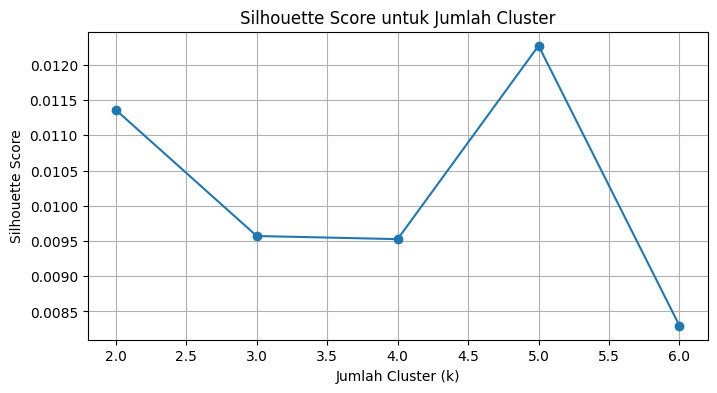

📌 Jumlah cluster terbaik berdasarkan Silhouette Score: 5


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Gunakan kembali df dari analisis sentimen
# df sudah berisi "clean_text" dan hasil preprocessing

# TF-IDF ulang untuk seluruh data (tanpa split train/test)
vectorizer_cluster = TfidfVectorizer(max_features=1000)
X_cluster = vectorizer_cluster.fit_transform(df_valid["clean_text"])

# Uji berbagai jumlah cluster
silhouette_scores = {}
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster)
    score = silhouette_score(X_cluster, labels)
    silhouette_scores[k] = score

# Plot Silhouette Score untuk tiap k
plt.figure(figsize=(8, 4))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.title("Silhouette Score untuk Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Pilih k terbaik (score tertinggi)
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"📌 Jumlah cluster terbaik berdasarkan Silhouette Score: {best_k}")

# Lakukan clustering final
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_valid["cluster"] = final_kmeans.fit_predict(X_cluster)


In [ ]:
pd.set_option('display.max_colwidth', None)

# Tampilkan kata-kata paling sering per cluster
for i in range(best_k):
    print(f"\n🔹 Topik Utama di Cluster {i}:")
    cluster_texts = df_valid[df_valid["cluster"] == i]["clean_text"]

    all_words = " ".join(cluster_texts).split()
    word_freq = pd.Series(all_words).value_counts().head(10)
    print(word_freq)

# Tampilkan contoh tweet dari masing-masing cluster
for i in range(best_k):
    print(f"\n📝 Contoh Tweet dari Cluster {i}:\n")
    sample = df_valid[df_valid["cluster"] == i]["full_text"].sample(3, random_state=42)
    print(sample.to_string(index=False))



🔹 Topik Utama di Cluster 0:
alam       14
sicepat    10
pakai       8
teman       7
buruk       6
paket       4
sih         4
banget      3
kali        3
3           2
Name: count, dtype: int64

🔹 Topik Utama di Cluster 1:
kurir      71
sicepat    50
pakai      25
jnt        24
banget     21
shopee     18
sih        16
ramah      15
gantung    15
paket      15
Name: count, dtype: int64

🔹 Topik Utama di Cluster 2:
sicepat    65
ya         39
banget     31
pakai      30
cepat      24
shopee     19
sih        17
jne        16
nya        14
express    13
Name: count, dtype: int64

🔹 Topik Utama di Cluster 3:
paket      50
sicepat    37
coba       24
pakai      19
mana       15
banget     13
tolong     13
stuck      12
nya        12
kasar      11
Name: count, dtype: int64

🔹 Topik Utama di Cluster 4:
pakai      51
sicepat    35
kirim      29
paket      28
banget     17
lambat     12
next        9
day         8
shopee      8
tanggal     8
Name: count, dtype: int64

📝 Contoh Tweet dari Clus

cluster
2    72
1    52
3    52
4    42
0    13
Name: count, dtype: int64


<Axes: title={'center': 'Distribusi Tweet per Cluster'}, ylabel='count'>

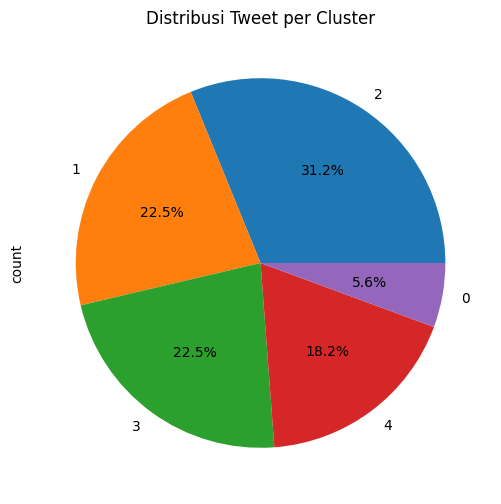

In [ ]:
# Ringkasan jumlah data per cluster
print(df_valid["cluster"].value_counts())

# Pie chart jumlah tweet tiap cluster
df_valid["cluster"].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="Distribusi Tweet per Cluster")


In [ ]:
data_label=df[["full_text","clean_text","label"]]

In [ ]:
word0 = data_label[data_label["label"] == -1]
word0

,full_text,clean_text,label
0,ga lagi lagi pakai sicepat next day serasa regular,pakai sicepat next day serasa regular,-1
1,halo tolong dong paket saya yang menggunakan ekspedisi sicepat ga ada update dari tanggal 1 maret 2025 udah coba complain ke sicepat tapi responnya disuruh sabar terus masalahnya itu paket penting dan harganya lumayan tolong dong tanggung jawabnya,halo tolong paket ekspedisi sicepat update tanggal 1 maret 2025 coba komplain sicepat responnya suruh sabar paket harga lumayan tolong tanggung,-1
2,kok shopee tumben kurir rekomendasinya pakai sicepat padahal aku udah merasa aman kalau bakal spx mana lama bgt,shopee tumben kurir rekomendasi pakai sicepat aman shopee express mana lambat banget,-1
3,halo tolong bantu kasus paket saya yg ditukar paket dikirim pakai jasa pesanan saya poco m6 yg datang infinix smart 9 sudah mengajukan komplain dgn melampirkan video unboxing seller juga melampirkan video packing lanjut,halo tolong bantu paket tukar paket kirim pakai jasa pesan poco m6 datang infinix smart 9 aju komplain lampir video unboxing jual lampir video packing,-1
4,sumpah gue benci banget sama kayak maksud gue kan tinggal pick up barang dibilang alamat gue tidak ditemukan padahal alamat sudah jelas bahkan sampe ke nomer kode pos udah coba email dan kasih nomer wa aktif malah dibilang sekarang nomer resi gue salah,sumpah benci banget kayak maksud tinggal pick up barang bilang alamat temu alamat nomer kode pos coba email kasih nomer whatsapp aktif bilang nomer resi salah,-1
...,...,...,...
217,sicepat gue pukul ya paket gapernah dipick up tapi notifnya selalu pick up gagal selama ini hrs nganter mulu mana jauh,sicepat ya paket enggak pernah dipick up notifnya pick up gagal nganter mulu mana,-1
219,sicepat jam 730 udh tutup aneh bngt dah,sicepat jam 730 tutup aneh banget,-1
225,tolong untuk staff office beretika yg baik ya saya td mau kirim paket bilang permisi sm karyawan ada beberapa cuma didiemin doang ga kasih petunjuk paket ditaro di mana karena biasanya saya kirim paket ada admin gudangnya tp admin gudangnya lagi gaada di tempat,tolong staff office etika ya kirim paket bilang permisi karyawan didiemin doang kasih tunjuk paket ditaro mana kirim paket admin gudang admin gudang tidak ada,-1
227,min kurang²in timbun² paket dehh semoga kedepannya bisa lebih baik lagi yaa,admin kurang in timbun paket deh moga depan ya,-1


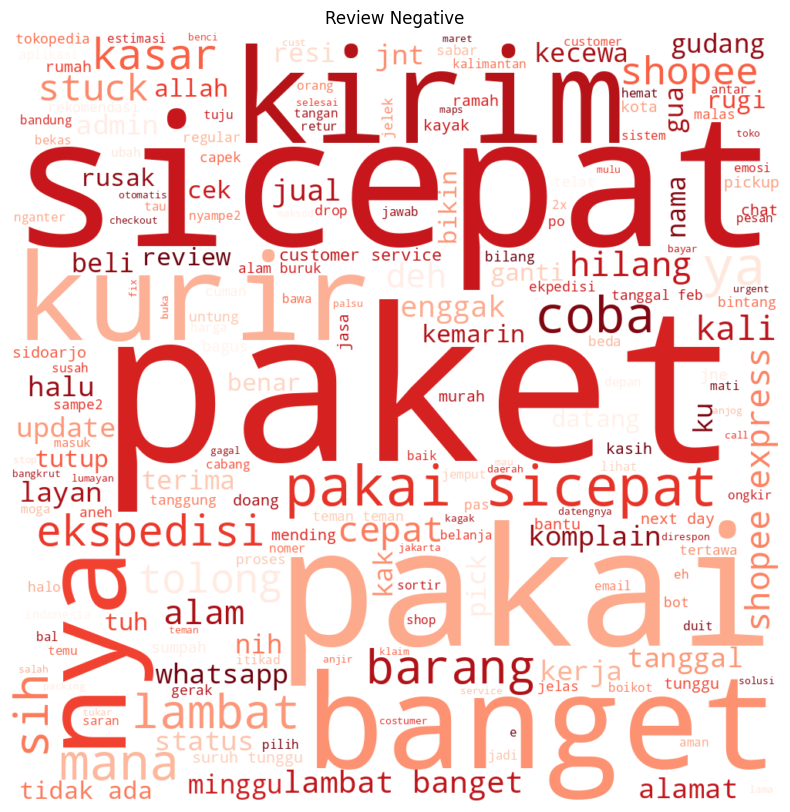

In [ ]:
all_text_s0 = ' '.join(word for word in word0["clean_text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Review Negative")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
word1 = data_label[data_label["label"] == 1]
word1

,full_text,clean_text,label
10,kalau pesan barang di shopee paling enak pakai sicepat dari kota asal langsung updatenya ke kota tujuan berapa jam kemudian sampai enak banget dehh,pesan barang shopee enak pakai sicepat kota langsung updatenya kota tuju jam enak banget deh,1
43,udah kapok ngirim paket pake emang expedisi jadul cuma dari jakarta ke bandung pake reguler aja gak sampe² udah 2 hari niat mau dukung pengusaha lokal malah kecewa mending pakai atau deh,kecewa kirim paket pakai expedisi jadul jakarta bandung pakai regular sampe 2 niat dukung usaha lokal kecewa mending pakai deh,1
57,jasa kirim yg paling bener emg sicepat jne jnt sisanya gatau jelek pengalaman gue apalagi sama orenexpress,jasa kirim sicepat jne jnt sisa tidak tahu jelek alam orenexpress,1
61,wktu pakai sicepat yg next day itu bener akurat sesuai estimasi ini kok lionparcel yaaaaaa ga sesuai buat apa bayar ongkir yg sehari sampe yak rugi bangetttt,pakai sicepat next day akurat sesuai estimasi lionparcel ya sesuai bayar ongkir hari ya rugi banget,1
77,paket yg cepet ternyata pakai pengiriman sicepat sama anter aja kalau ekspedisi lain sampe sekarang stuck,paket cepat pakai kirim sicepat anter ekspedisi stuck,1
...,...,...,...
222,terima kasih kurir jnt jne anter aja sicepat ninja tempat sy kalian selalu yg terbaik selalu ngabari dulukalo sy pas punya panenan labu madu atau pepaya jagung manis jagung ketan atau sayuran lainnya sy beri mereka untuk dimasak dirumah eh jd seperti temen akrab,terima kasih kurir jnt jne anter sicepat ninja baik ngabari dulukalo pas panen labu madu pepaya jagung manis jagung ketan sayur masak rumah eh teman akrab,1
224,mantap monitor juga nyampe dihari yang sama aku cinta lion parcel dan sicepat kargo gokil,mantap monitor hari cinta lion parcel sicepat kargo keren,1
226,keren deh sicepat semalem baru drop jam 12 siang td udh pada sampe di buyerku,keren deh sicepat semalem drop jam 12 siang buyerku,1
228,keren banget sicepat halu coy ngirim paket tegal jogja ngga ada 24 jam padahal drop off paketnya senin siang sekarang paketnya dah sampe aja,keren banget sicepat halu coy kirim paket tegal jogja 24 jam drop off paket senin siang paket,1


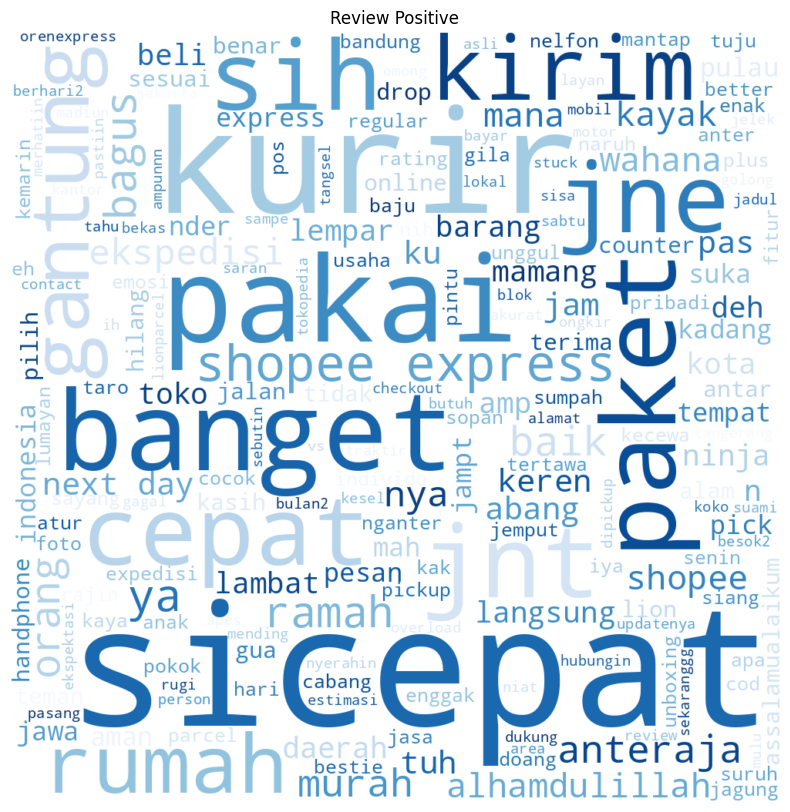

In [ ]:
all_text_s0 = ' '.join(word for word in word1["clean_text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Review Positive")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = text.strip()
    text = re.sub(r'@\w+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag
    text = re.sub(r'http\S+|www.\S+', '', text)  # Hapus link
    text = re.sub(r'[^\w\s,.!?]', '', text, flags=re.UNICODE)  # Hapus emoji/simbol
    text = re.sub(r'\s+', ' ', text)  # Hapus spasi berlebih

    return text

# Load dataset hasil scraping
df = pd.read_csv("scrapping-review-sicepat.csv")

df= df.drop_duplicates(subset="full_text")

# Terapkan pembersihan
df['cleaned_text'] = df['full_text'].apply(clean_text)

# --- EXTRACT EDGES (mention, reply, retweet) ---
edges = []
for _, row in df.iterrows():
    source = row['username']

    # Mention
    mentions = re.findall(r'@(\w+)', row['full_text'])
    for target in mentions:
        edges.append((source, target, 'mention'))

    # Reply
    if pd.notna(row['in_reply_to_screen_name']):
        edges.append((source, row['in_reply_to_screen_name'], 'reply'))

    # Retweet
    if row['full_text'].startswith("RT @"):
        match = re.match(r"RT @(\w+)", row['full_text'])
        if match:
            edges.append((source, match.group(1), 'retweet'))

# --- EDGE LIST UNTUK GEPHI ---
edge_rows = []
for source, target, interaction in edges:
    edge_rows.append({
        'Source': source,
        'Target': target,
        'Type': 'Directed',
        'Weight': 1,
        'Interaction': interaction
    })

df_edges = pd.DataFrame(edge_rows)
df_edges = df_edges.groupby(['Source', 'Target', 'Type', 'Interaction']).agg({'Weight': 'sum'}).reset_index()

# --- NODE LIST UNTUK GEPHI ---
all_users = set(df_edges['Source']).union(set(df_edges['Target']))
df_nodes = pd.DataFrame({'Id': list(all_users)})
df_nodes['Label'] = df_nodes['Id']

# --- KUMPULKAN TEKS PER USER UNTUK TOPIK/TF-IDF ---
df_user_texts = df.groupby('username')['cleaned_text'].apply(lambda texts: ' '.join(texts)).reset_index()
df_user_texts.columns = ['Id', 'AllText']

# --- EXPORT SEMUA KE CSV ---
df_edges.to_csv("gephi_project_edges.csv", index=False)
df_nodes.to_csv("gephi_project_nodes.csv", index=False)
df_user_texts.to_csv("gephi_project_user_texts.csv", index=False)
df.to_csv("scrapped_cleaned_merged.csv", index=False)

Kolom yang tersedia: Index(['conversation_id_str', 'created_at', 'favorite_count', 'label',
       'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang',
       'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')


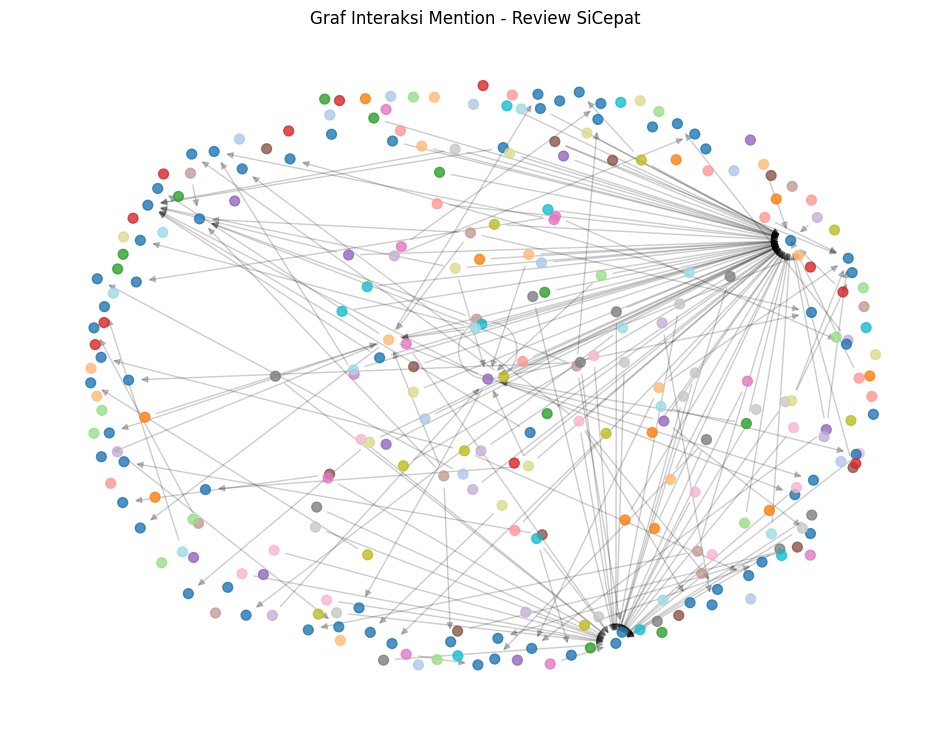

In [ ]:
# =======================
# 1. PERSIAPAN DATA
# =======================
import pandas as pd
import re

# Load data
df = pd.read_csv("scrapping-review-sicepat.csv")

# Lihat kolom yang tersedia
print("Kolom yang tersedia:", df.columns)

# Ganti ini sesuai nama kolom teks tweet di datamu
text_column = "full_text"       # kolom teks isi tweet
user_column = "username"        # kolom nama pengguna
retweet_column = "retweet_count" if "retweet_count" in df.columns else None
like_column = "like_count" if "like_count" in df.columns else None

# Ekstrak mention dari tweet
def extract_mentions(text):
    return re.findall(r"@(\w+)", str(text))

df["mentions"] = df[text_column].apply(extract_mentions)

# =======================
# 2. BANGUN GRAF JEJARING
# =======================
import networkx as nx

G = nx.DiGraph()

# Tambahkan edge berdasarkan mention
for _, row in df.iterrows():
    source_user = row[user_column]
    mentioned_users = row["mentions"]
    for target_user in mentioned_users:
        if target_user != "":
            G.add_edge(source_user, target_user, interaction="mention")

# Tambahkan atribut node: total retweet dan like
for _, row in df.iterrows():
    user = row[user_column]
    if not G.has_node(user):
        G.add_node(user)
    if retweet_column:
        G.nodes[user]["retweet"] = G.nodes[user].get("retweet", 0) + int(row[retweet_column])
    if like_column:
        G.nodes[user]["like"] = G.nodes[user].get("like", 0) + int(row[like_column])

# Ambil posisi layout
pos = nx.spring_layout(G, k=0.5, seed=42)

# Warna berdasarkan komunitas
node_colors = [community_map.get(node, 0) for node in G.nodes()]

plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.tab20, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.title("Graf Interaksi Mention - Review SiCepat")
plt.axis("off")
plt.show()

Jumlah pengguna (nodes): 191
Jumlah interaksi mention (edges): 189


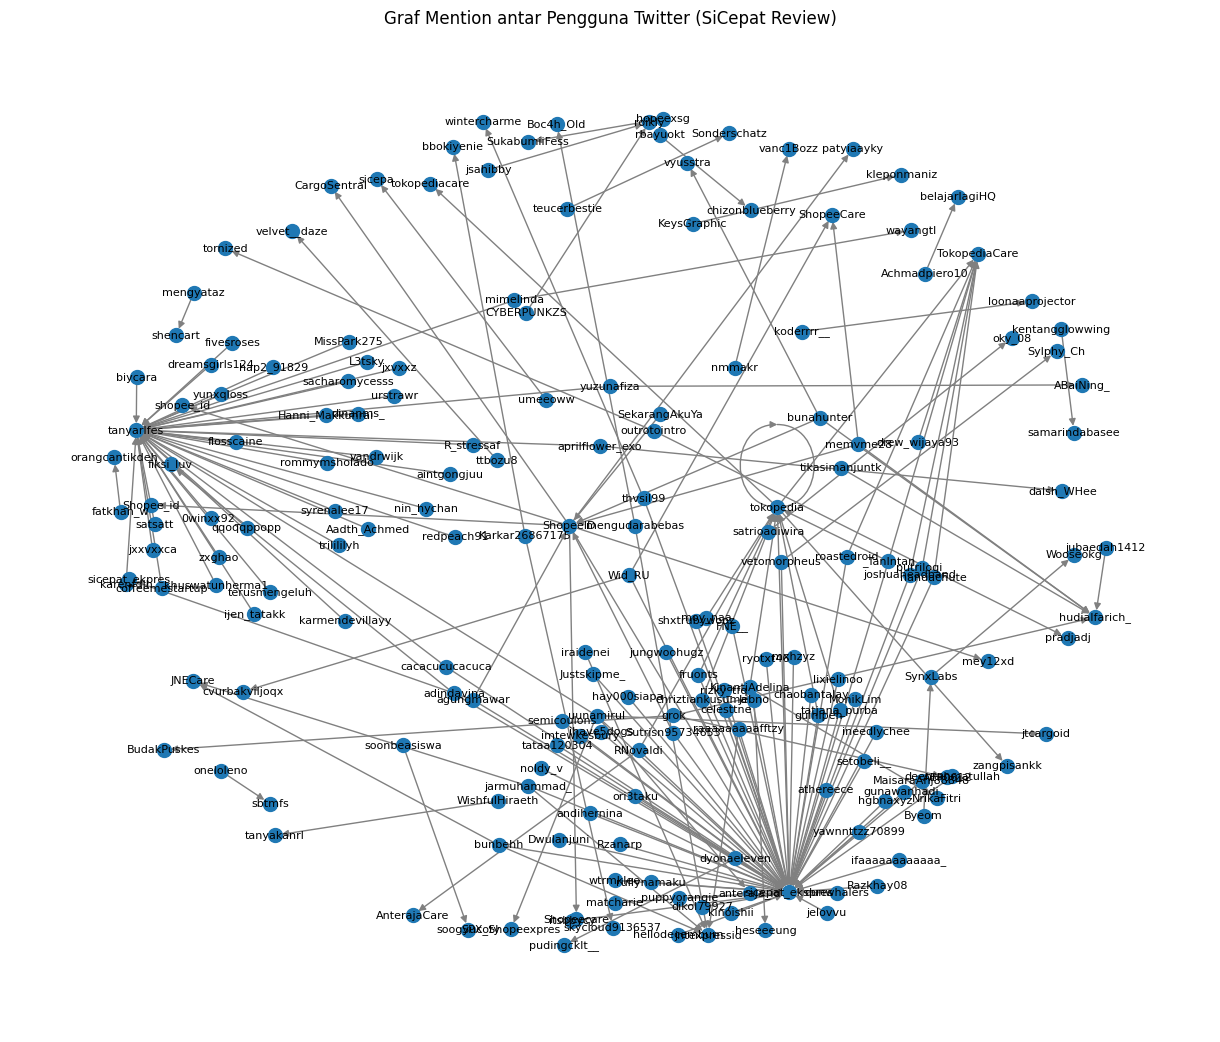


Top 10 pengguna yang paling sering disebut (in-degree):
1. @sicepat_ekspres - disebut 65 kali
2. @tanyarlfes - disebut 38 kali
3. @tokopedia - disebut 9 kali
4. @TokopediaCare - disebut 7 kali
5. @ShopeeID - disebut 5 kali
6. @jntexpressid - disebut 5 kali
7. @hudialfarich_ - disebut 5 kali
8. @JNECare - disebut 2 kali
9. @ShopeeCare - disebut 2 kali
10. @roikly - disebut 2 kali


In [ ]:
# 🕸️ Inisialisasi graf mention
G = nx.DiGraph()

# 🔍 Looping tiap baris untuk ambil mention
for _, row in df.iterrows():
    author = row['username']
    text = str(row['full_text'])
    mentions = re.findall(r'@(\w+)', text)

    for mention in mentions:
        G.add_edge(author, mention)

# 📊 Informasi dasar graf
print(f"Jumlah pengguna (nodes): {G.number_of_nodes()}")
print(f"Jumlah interaksi mention (edges): {G.number_of_edges()}")

# 📈 Visualisasi jaringan
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, edge_color='gray', arrows=True)
plt.title("Graf Mention antar Pengguna Twitter (SiCepat Review)")
plt.show()

# 🧠 Analisis: 10 pengguna yang paling sering disebut
in_degrees = dict(G.in_degree())
top_mentioned = sorted(in_degrees.items(), key=lambda x: -x[1])[:10]

print("\nTop 10 pengguna yang paling sering disebut (in-degree):")
for i, (user, degree) in enumerate(top_mentioned, start=1):
    print(f"{i}. @{user} - disebut {degree} kali")


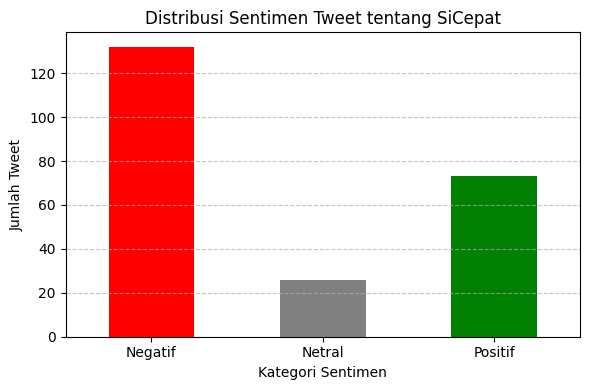

In [ ]:
label_map = {-1: "Negatif", 0: "Netral", 1: "Positif"}
df['label_text'] = df['label'].map(label_map)

# Hitung jumlah tiap label
label_counts = df['label_text'].value_counts().sort_index()

# Visualisasi diagram batang
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['red', 'gray', 'green'])

plt.title("Distribusi Sentimen Tweet tentang SiCepat")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Tweet")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()